
## Prevendo Customer Churn em Operadoras de Telecom
##### Churn, numa definição mais generalista, é uma métrica que indica quantos clientes cancelaram sua assinatura em um determinado período.

## Objetivos do projeto:
##### Esse projeto busca identificar antecipadamente não só os clientes com potencial de cancelamento de seus planos mas também qual a probabilidade de renovação.

_______

Importação dos módulos que serão utilizados, bem como do arquivo disponibilizado:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
import pickle
from sklearn import metrics

df = pd.read_csv('projeto4_telecom_treino.csv')

Breve visualização dos dados:

In [2]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,area_code_415,area_code_415,area_code_415,area_code_408,area_code_415
international_plan,no,no,no,yes,yes
voice_mail_plan,yes,yes,no,no,no
number_vmail_messages,25,26,0,0,0
total_day_minutes,265.1,161.6,243.4,299.4,166.7
total_day_calls,110,123,114,71,113
total_day_charge,45.07,27.47,41.38,50.9,28.34


Breve descrição estatística dos dados:

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3333.0,1667.000000,962.298550,1.00,834.00,1667.00,2500.00,3333.00
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Verificação de valores NaN:

In [4]:
if df.columns.isnull().any():
    for column in df.columns:
       print('{0} existem {1} nvelores NaN'.format(column, df[column].isnull().sum()))
else:
    print('Não há valores NaN')

Não há valores NaN


In [5]:
categoric_columns = ['Unnamed: 0', 'state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numeric_columns = df.columns[~df.columns.isin(categoric_columns)]

Correlação entre as variáveis:

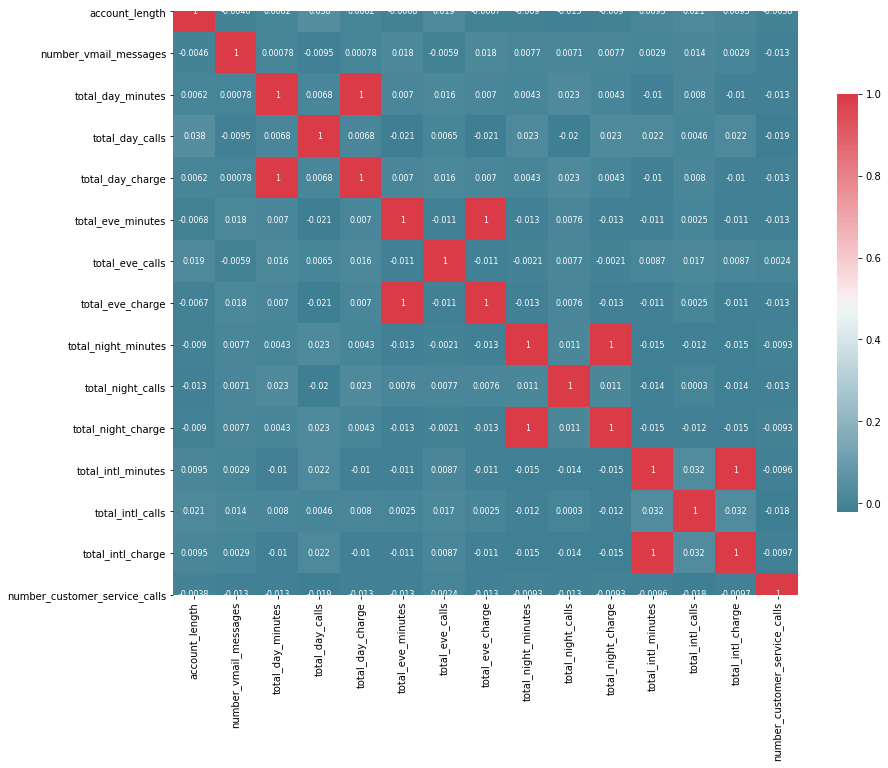

In [6]:
corr = df[numeric_columns].corr()
_ , ax = plt.subplots( figsize =( 14 , 11 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .7 }, ax=ax, annot = True, annot_kws = {'fontsize' : 8 })

As variáveis que representam o total pago por minuto são totalmente correlacionadas às variáveis de tempo de utilização, isso por que uma é consequência da outra.

Não utilizarei todas para evitar problemas de multicolinearidade.

Crio também listas com as colunas que serão utilizadas no modelo para facilitar algumas checagens futuras.

In [7]:
df.drop(['total_day_charge', 'total_eve_charge', 'total_intl_charge'], axis=1, inplace=True)
categoric_columns = ['Unnamed: 0', 'state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
numeric_columns = df.columns[~df.columns.isin(categoric_columns)]
colunas = list(df.columns)

Balanceamento das Classes:


In [8]:
df.churn.value_counts()

no     2850
yes     483
Name: churn, dtype: int64

precisamos ajustar para o modelo não aprender mais sobre quem não deu churn do que sobre quem deu churn.

Algumas técnicas pra ajuste de balanceamento são possíveis aqui, eu poderia aplicar SMOTE por exemplo que gera dados sintéticos para balanceamento das duas classes, mas optei aqui por coletar de forma aleatória a mesma quantidade de dados para as duas classes e treinar o modelo com os dados reais. 

In [9]:
if len(df[df.churn=='no']) > len(df[df.churn=='yes']):
    df_churn = pd.concat([df[df.churn=='no'].sample(len(df[df.churn=='yes'])),
                         df[df.churn=='yes']], ignore_index=True)
else:
    df_churn = pd.concat([df[df.churn=='yes'].sample(len(df[df.churn=='no'])),
                         df[df.churn=='no']], ignore_index=True)
    
df_churn.churn.value_counts()

yes    483
no     483
Name: churn, dtype: int64

A quantidade de dados para treino acabou ficando pequena e dependenddo do resulto eu volto e aplico o SMOTE.

Aplicando Label encoder e transformando strings em números:

In [10]:
list_encoder = categoric_columns[1:]

for col in list_encoder:
    X = df.loc[:, [col]].values
    le = LabelEncoder()
    X[:, 0] = le.fit_transform(X[:, 0])
    df[col] = X

Normalização dos dados:
    

In [12]:
scaler = StandardScaler().fit(df[numeric_columns].values)
standardX = scaler.transform(df[numeric_columns].values)
df[numeric_columns] = standardX
round(df[numeric_columns].describe().T,3)

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,0.0,1.0,-2.513,-0.680,-0.002,0.651,3.565
number_vmail_messages,3333.0,0.0,1.0,-0.592,-0.592,-0.592,0.870,3.135
total_day_minutes,3333.0,-0.0,1.0,-3.301,-0.662,-0.007,0.673,3.140
total_day_calls,3333.0,-0.0,1.0,-5.005,-0.670,0.028,0.676,3.218
total_eve_minutes,3333.0,-0.0,1.0,-3.964,-0.678,0.008,0.677,3.209
total_eve_calls,3333.0,0.0,1.0,-5.026,-0.658,-0.006,0.697,3.508
total_night_minutes,3333.0,0.0,1.0,-3.514,-0.670,0.006,0.681,3.839
total_night_calls,3333.0,-0.0,1.0,-3.430,-0.670,-0.006,0.659,3.828
total_night_charge,3333.0,-0.0,1.0,-3.515,-0.668,0.005,0.681,3.837
total_intl_minutes,3333.0,0.0,1.0,-3.667,-0.622,0.022,0.667,3.497


Definindo o tipo de cada variável e excluindo a coluna 'Unnamed: 0' que não é necessária para o treino do modelo:

In [17]:
df[numeric_columns] = df[numeric_columns].astype(float)
df[categoric_columns] = df[categoric_columns].astype(str)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
state                            3333 non-null object
account_length                   3333 non-null float64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null float64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null float64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls                 3333 non-null float64
number_customer_service_calls    3333 non-null float64
churn            

Utilizando um modelo de árvore de decisão pra visualizar as variáveis mais importantes para previsao de churn:


In [18]:
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop('churn', axis=1).values

Y = df.churn.values

modelo = ExtraTreesClassifier()
modelo.fit(X, Y);

X_train = df.drop('churn', axis=1)
features = [col for col in list(X_train) ]
importances =  modelo.feature_importances_
descending_indices = np.argsort(importances)[::-1]
sorted_importances = [importances[idx] for idx in descending_indices]
sorted_features = [features[idx] for idx in descending_indices]
print('As características mais importantes são %s' % sorted_features[0:3])

As características mais importantes são ['total_day_minutes', 'number_customer_service_calls', 'total_eve_minutes']


Plot das características mais importantes para para previsão de churn:

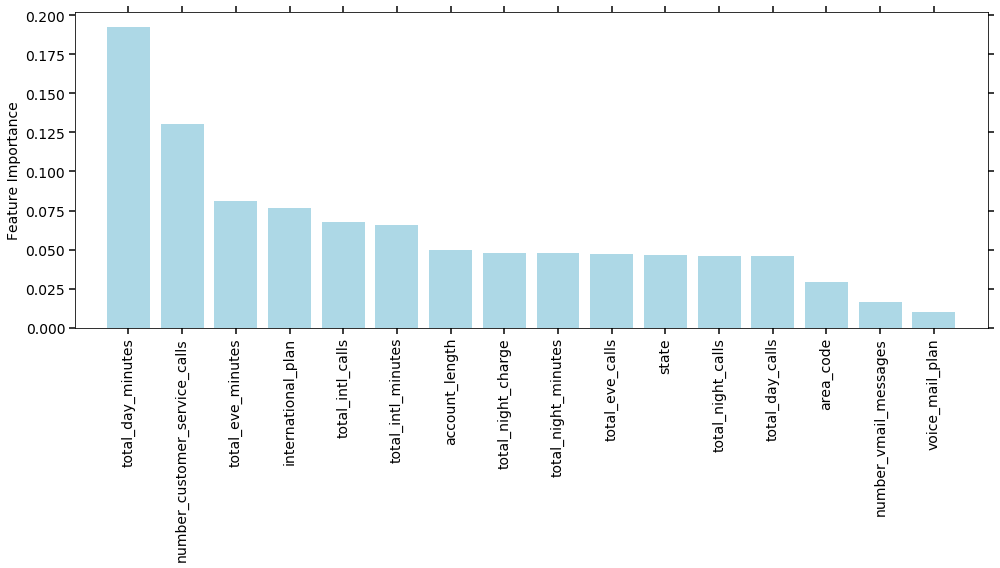

In [19]:
def plot_importances(X_train, sorted_features, sorted_importances):

    axis_width = 1.5
    maj_tick_len = 6
    fontsize = 14
    bar_color = 'lightblue'
    align = 'center'
    label = '__nolegend__'
    ax = plt.bar(range(X_train.shape[1]), sorted_importances, color=bar_color, align=align, label=label)
    ax = plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
    ax = plt.xlim([-1, X_train.shape[1]])
    ax = plt.ylabel('Feature Importance', fontsize=fontsize)
    ax = plt.tick_params('both', length=maj_tick_len, width=axis_width, which='major', right=True, top=True)
    ax = plt.xticks(fontsize=fontsize)
    ax = plt.yticks(fontsize=fontsize)
    ax = plt.tight_layout()
    return ax

fig1 = plt.figure(1, figsize=(14,8))
ax = plot_importances(X_train, sorted_features, sorted_importances)

plt.show()

#### Escolha do modelo

Com o código abaixo aplico cross validation utilizando 6 modelos de classificação distintos que me ajudam a escolher o melhor algoritmo para esse problema, a métrica utilizada é a acurácia e ao final vemos a média, valor máximo e desvio padrão dos resultados de cada das 10 iterações realizadas em cada algoritmo, além de boxplots com os resultados:

NB: 0.853577 0.879880 (0.018368)
KNN: 0.863478 0.891892 (0.017163)
LR: 0.863191 0.882883 (0.009441)
LDA: 0.852083 0.865269 (0.011015)
CART: 0.910595 0.936937 (0.016900)
XGB : 0.956201 0.975976 (0.009486)


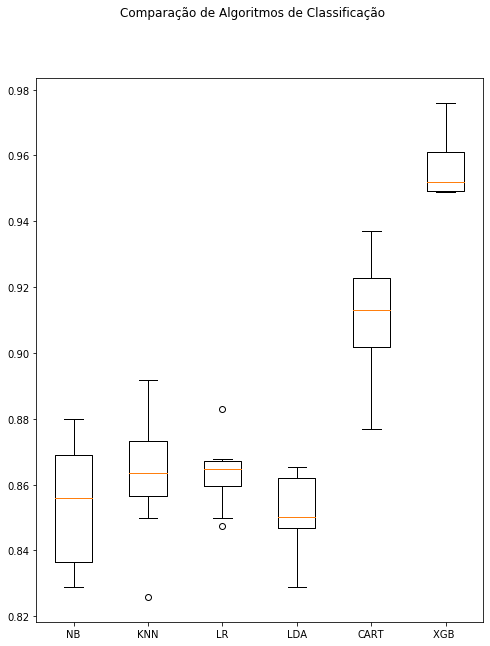

Wall time: 4.94 s


In [102]:
%%time

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


X = df.drop(['churn'], axis=1).values
Y = df.churn.values

num_folds = 10

modelos = []
resultados = []
nomes = []

modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('XGB ', XGBClassifier()))


for nome, modelo in modelos:
    kfold = KFold(num_folds, True)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f %f (%f)" % (nome, cv_results.mean(), cv_results.max(), cv_results.std())
    print(msg)


fig = plt.figure(figsize= (8,10))
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Aqui aplico um método de otimização de hiperparâmetros do algortimo que obteve o melhor resultado, o XGBOOST:

In [103]:
%%time

from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)
parameters = {'max_depth': range (4, 10, 1), 'n_estimators': range(80, 240, 20), 'learning_rate': [0.1, 0.01, 0.05]}

grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, 
                           scoring = 'accuracy', n_jobs = 10, cv = 10,
                           verbose=True )

grid_search.fit(X, Y)
print("Accuracy: %.3f" % (grid_search.best_score_ * 100), '\n', grid_search.best_estimator_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   20.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 10.5min
[Parallel(n_jobs=10)]: Done 1440 out of 1440 | elapsed: 12.8min finished


Accuracy: 95.950 
 XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
Wall time: 12min 46s


Aqui aplico novamente cross validation, mas agora com o modelo escolhido e otimizado:

In [104]:
%%time

X = df.drop(['churn'], axis=1).values
Y = df.churn.values

num_folds = 15
kfold = KFold(num_folds, True)

modelo = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=80, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

resultado = cross_val_score(modelo, X, Y, cv = kfold)

print('\n', "Acurácia Final: %.3f%%" % (resultado.mean() * 100.0), '\n',
      'max:', (resultado.max() * 100.0), '\n',                          
      'STD:',resultado.std(), '\n')


 Acurácia Final: 95.618% 
 max: 99.55156950672645 
 STD: 0.015124895616181598 

Wall time: 4.74 s


Faço fit com o modelo já otimizado e salvo pra aplicar posteriormente:

In [105]:
modelo.fit(X,Y)
pickle.dump(modelo, open('model_xgb_dsa.sav','wb'))

------

## Gerando previsões nos dados de teste disponibilizados:

Carregando os dados de teste:

In [47]:
df_teste = pd.read_csv('projeto4_telecom_teste.csv')
df_teste.head().T

,0,1,2,3,4
Unnamed: 0,1,2,3,4,5
state,HI,MT,OH,NM,SC
account_length,101,137,103,99,108
area_code,area_code_510,area_code_510,area_code_408,area_code_415,area_code_415
international_plan,no,no,no,no,no
voice_mail_plan,no,no,yes,no,no
number_vmail_messages,0,0,29,0,0
total_day_minutes,70.9,223.6,294.7,216.8,197.4
total_day_calls,123,86,95,123,78
total_day_charge,12.05,38.01,50.1,36.86,33.56


Verificando se existem valores NaN:

In [48]:
if df_teste.columns.isnull().any():
    for column in df_teste.columns:
       print('{0} existem {1} nvelores NaN'.format(column, df_teste[column].isnull().sum()))
else:
    print('Não há valores NaN')

Não há valores NaN


Aqui verifico se os dados de teste contém a mesmas variáveis utlizadas para treino do modelo:

In [49]:
if len(colunas) > len(list(df_teste.columns)):
    print( 'As variáveis', list(set(colunas) - set(list(df_teste.columns))), 'não existem nos dados de teste')
    
else:
    print('Todas as variáveis existem no dados de teste')
    
if len(list(df_teste.columns)) > len(colunas):
    print( 'As variáveis', list( set(list(df_teste.columns)) - set(colunas)), 'não existem nos dados de treino')
    
else:
    print('Todas as variáveis existem no dados de treino')  

Todas as variáveis existem no dados de teste
As variáveis ['total_intl_charge', 'total_day_charge', 'total_eve_charge'] não existem nos dados de treino


São exatamente as variáveis que removi pra evitar multicolinearidade, serão removidas abaixo.

Removo as colunas 'total_day_charge', 'total_intl_charge', 'total_eve_charge', aplico label encoder e normalização, assim como nos dados de treino.

Faço também uma cópia dos dados antes das transformações para facilitar a compreensão do resultado final, dessa forma consigo determinar de forma mais eficaz os possíveis churns sem ter que reverter as transformações feitas no dataset original.

In [50]:
df_teste.churn.replace('no', 0, inplace=True)
df_teste.churn.replace('yes', 1, inplace=True)

df_teste_copy = df_teste.copy()
df_teste.drop(['total_day_charge', 'total_eve_charge', 'total_intl_charge', 'Unnamed: 0', 'churn'], axis=1, inplace=True)

Aplico as mesmas transformções de label encoder e normalização dos dados:

In [51]:
for col in categoric_columns[1:-1]:
    X = df_teste.loc[:, [col]].values
    le = LabelEncoder()
    X[:, 0] = le.fit_transform(X[:, 0])
    df_teste[col] = X

scaler = StandardScaler().fit(df_teste[numeric_columns].values)
standardX = scaler = scaler.transform(df_teste[numeric_columns].values)
df_teste[numeric_columns] = standardX
round(df_teste[numeric_columns].describe().T,3)

,count,mean,std,min,25%,50%,75%,max
account_length,1667.0,0.0,1.0,-2.479,-0.677,-0.016,0.694,3.538
number_vmail_messages,1667.0,0.0,1.0,-0.534,-0.534,-0.534,-0.534,3.396
total_day_minutes,1667.0,-0.0,1.0,-3.314,-0.713,-0.006,0.653,3.228
total_day_calls,1667.0,-0.0,1.0,-3.375,-0.684,-0.011,0.662,3.146
total_eve_minutes,1667.0,-0.0,1.0,-3.538,-0.678,0.009,0.644,3.173
total_eve_calls,1667.0,-0.0,1.0,-3.176,-0.629,-0.018,0.645,3.497
total_night_minutes,1667.0,0.0,1.0,-3.955,-0.651,-0.001,0.667,3.613
total_night_calls,1667.0,-0.0,1.0,-4.806,-0.654,-0.026,0.650,3.402
total_night_charge,1667.0,-0.0,1.0,-3.955,-0.650,-0.002,0.668,3.612
total_intl_minutes,1667.0,0.0,1.0,-3.820,-0.634,0.033,0.626,3.479


Carrego o modelo treinado que foi salvo anterior e faço as previsões, em seguida crio a coluna 'previsoes' no dataset cópia e atribuo a essa coluna todas previsões:

In [52]:
modelo = pickle.load(open('model_xgb_dsa.sav', 'rb'))
X = df_teste.values
previsoes = modelo.predict(X)
df_teste_copy['previsoes'] = previsoes.astype(int)

Avaliação do resultado final:

In [53]:
print('previsões:', '\n', df_teste_copy.previsoes.value_counts(), '\n')
print('Dados reais:', '\n', df_teste_copy.churn.value_counts(), '\n')

print("Confusion Matrix:")
print("{0}".format(metrics.confusion_matrix(df_teste_copy.churn.values, df_teste_copy.previsoes.values, labels = [1, 0])))
print("")

print("Classification Report:")
print(metrics.classification_report(df_teste_copy.churn.values, df_teste_copy.previsoes.values, labels = [1, 0]))

previsões: 
 0    1490
1     177
Name: previsoes, dtype: int64 

Dados reais: 
 0    1443
1     224
Name: churn, dtype: int64 

Confusion Matrix:
[[ 166   58]
 [  11 1432]]

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.74      0.83       224
           0       0.96      0.99      0.98      1443

    accuracy                           0.96      1667
   macro avg       0.95      0.87      0.90      1667
weighted avg       0.96      0.96      0.96      1667



##### Outro método que pode ser utilizado é ao invés de prever se um usuário deixará a empresa, prever qual a probabilidade de um cliente fazê-lo.
##### Dessa forma a equipe de retenção pode criar estratégias distintas de acordo com a probablidade de cada cliente cancelar a assinatura:

In [58]:
probabilidades = modelo.predict_proba(X)
df_teste_copy['probabilidades'] = 0
df_teste_copy['probabilidades'] = probabilidades

In [72]:
df_teste_copy[['Unnamed: 0',
               'previsoes', 'probabilidades']].sample(10)

,Unnamed: 0,previsoes,probabilidades
327,328,0,0.990993
128,129,1,0.014897
198,199,0,0.935228
346,347,0,0.977894
1031,1032,0,0.977056
1455,1456,1,0.031312
16,17,0,0.932540
662,663,0,0.977820
129,130,0,0.908136
43,44,1,0.429825
